<center><font size="6" color="Black">PREDICTION OF EMPATHY</font></center>
1. <b>@author : Chirag Soni</b>
2. <b>Course: CS 412: Introduction to Machine Learning</b>
3. <b>Assignment 5: Mini Project</b>



In [35]:
#Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
from  sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

1. <b>Installation of XGBoost using Anaconda python version 3.x.
2. Command: <i>conda install -c conda-forge xgboost</i></b>

In [36]:
#LOADING DATA

print("Loading Data...")
print(" ")
df = pd.read_csv('../Data/young-people-survey/responses.csv')
#print(df.shape)
print(" data loaded successfully..")

Loading Data...
 
 data loaded successfully..


<center><font size="6" color="Black">MISSING VALUES</font></center>

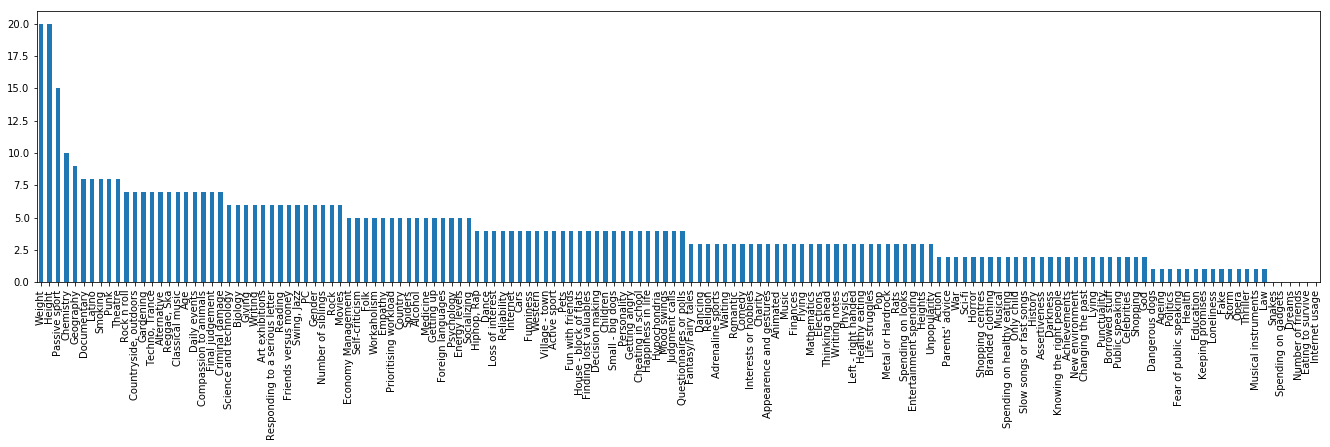

In [37]:
nulls = df.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))
plt.show()

In [38]:

print("Dropping empty rows...")
print(" ")
df = df.dropna(axis=0, how='any')
#print(df.shape)

#Feature Explosion of categorical attributes
print("Converting categorical features to numeric features using feature explosion...")
print(" ")
df=pd.get_dummies(df)

#Removing Empathy and all non-numeric column
df1=df.drop(['Empathy'], axis=1)
#print (df1.shape)
X=df1

Y = df["Empathy"]
print(Y.head())

Dropping empty rows...
 
Converting categorical features to numeric features using feature explosion...
 
0    3.0
1    2.0
2    5.0
4    3.0
5    4.0
Name: Empathy, dtype: float64


<b>In the given dataset, we also have some categorical features like Smoking, Gender etc. that cannot be directly dropped since there is no confidence that there is no correaltion between these features and the the target feature i.e. 'Empathy' so I decided to perform feature explosion using 'get_dummies" method of sklearn. This method inturns considers each value of categorical feature as a separate feature.</b>

<center><font size="6" color="Black">FINDING THE TOP 16 FEATURES</font></center>
<b><i>Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data </i></b>

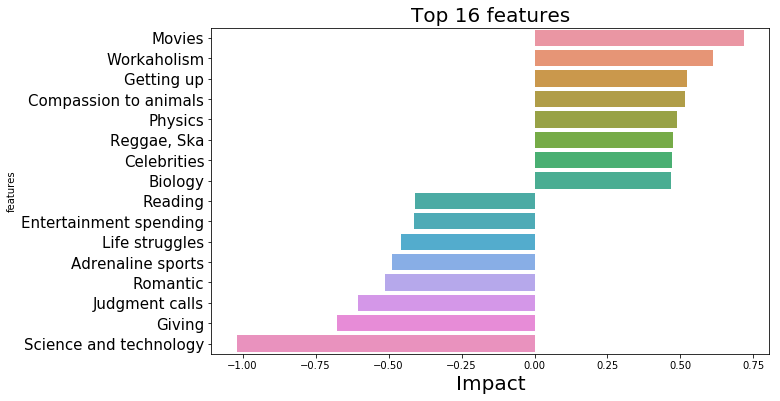

In [39]:
#-----------Finding top 15 features-----------------#
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

y=df
clean_data = df1
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X1 = X.apply(lambda x: x.fillna(x.mean()),axis=0)
Y1 = y['Empathy']

#Standardisation
scaler = StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)

clr = LogisticRegression()
clr.fit(X2, Y1)
feat_coeff = pd.DataFrame({'features': features_int,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

top10 = pd.concat([feat_coeff.head(8),feat_coeff.tail(8)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
sns.barplot(y=top10.features, x=top10.impacts, ax=ax1)
_=ax1.set_title('Top 16 features', size=20)
_=ax1.set_yticklabels(labels=top10.features, size=15)
_=ax1.set_xlabel('Impact', size=20)
plt.show()

<center><font size="6" color="Black">FEATURE EXTRACTION</font></center>

In [40]:
#-----Feature Selection Methods-----#

#Method 1: Tree Based Feature Selection
clf1 = ExtraTreesClassifier()
clf1 = clf1.fit(X, Y)
model1 = SelectFromModel(clf1, prefit=True)

X_new1 = model1.transform(X)
print(X_new1.shape)


(674, 87)


<b> Too many unwwanted features are selected so cannot use this method </b>

In [41]:
#Method 2: L1-based Feature Selection
print("Using Regularisation using L1 based Feature selection method for Feature Extraction...")
print(" ")

clf2 = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model2= SelectFromModel(clf2, prefit=True)
X_new2 = model2.transform(X)
print(X_new2.shape)

Using Regularisation using L1 based Feature selection method for Feature Extraction...
 
(674, 30)


<center><font size="4" color="Black">Correaltion between top 10 features </font></center>

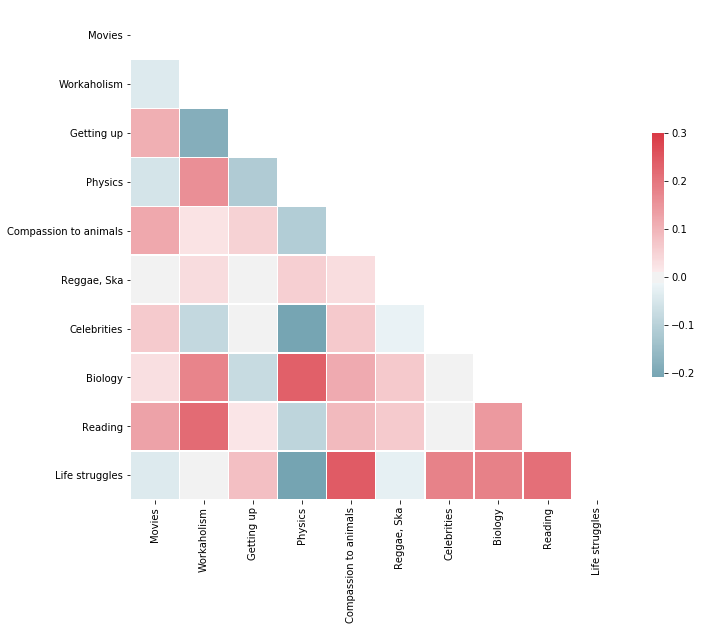

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns

good_columns= ['Movies', 'Workaholism', 'Getting up', 'Physics','Compassion to animals',
               'Reggae, Ska', 'Celebrities', 'Biology', 'Reading', 'Life struggles']

corr = df[good_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<b>For feature extraction, I have used L1-based feature selection method so baiscally, it is kind of l1 norm regularisation technique to select features. Since, each time you run the above cell, the number of features selected changes (in the range of +/-1), and so the model of accuracies changes after each run. 

In [43]:
#Method 3: Dimensionality Reduction using Principle Component Analysis (PCA)
#----Tried combining PCA and feature selection techniques but it takes a lot of time to train the model for Logistitc
#Regrssion---#
pca = PCA(n_components=2)
pca.fit(X)
X_new=pca.transform(X)
clf2 = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, Y)
model2= SelectFromModel(clf2, prefit=True)
X_new3 = model2.transform(X_new)
print(X_new.shape)

(674, 2)


1. <b>Feature selection doesn't combine attributes. Just evaluates their quality, predictive power and select the best set.PCA combines similar (correlated) attributes and creates new ones. Superior to original attributes. </b>
2. <b><i>Note: PCA makes Logistic Regression take a lot of time to fit the model, so it is not used further and L1 based feature extractor is used</i></b>

<center><font size="6" color="Black">TRAIN/DEV/TEST Data Split</font></center>


1. Training Data: 80%
2. Development Data: 10%
3. Test Data : 10%

In [44]:
#Selecting the transformed data we got using L1 Based Feature selection technique
print("Splitting Data into TRAIN/ DEV/ TEST dataset in ratio 90:10:10 ")
print(" ")

train=X_new2
classes=Y
length=train.shape[0]

f=int(0.8 * length)
l=int(0.9 * length)

#------Train Dataset-----#
xtrain=train[0:f]
ytrain=classes[0:f]
print("Number of Training Data: ",xtrain.shape[0])


#-------Development Dataset-----#
xdev=train[f:l]
ydev=classes[f:l]
print("Number of Development Data: ",xdev.shape[0])


#---------Test Dataset-------#
xtest=train[l:]
ytest=classes[l:]
print("Number of Test Data: ",xtest.shape[0])


Splitting Data into TRAIN/ DEV/ TEST dataset in ratio 90:10:10 
 
Number of Training Data:  539
Number of Development Data:  67
Number of Test Data:  68


<center><font size="6" color="Black">QUICK LOOK ON FEATURES TO DEAL WITH</font></center>

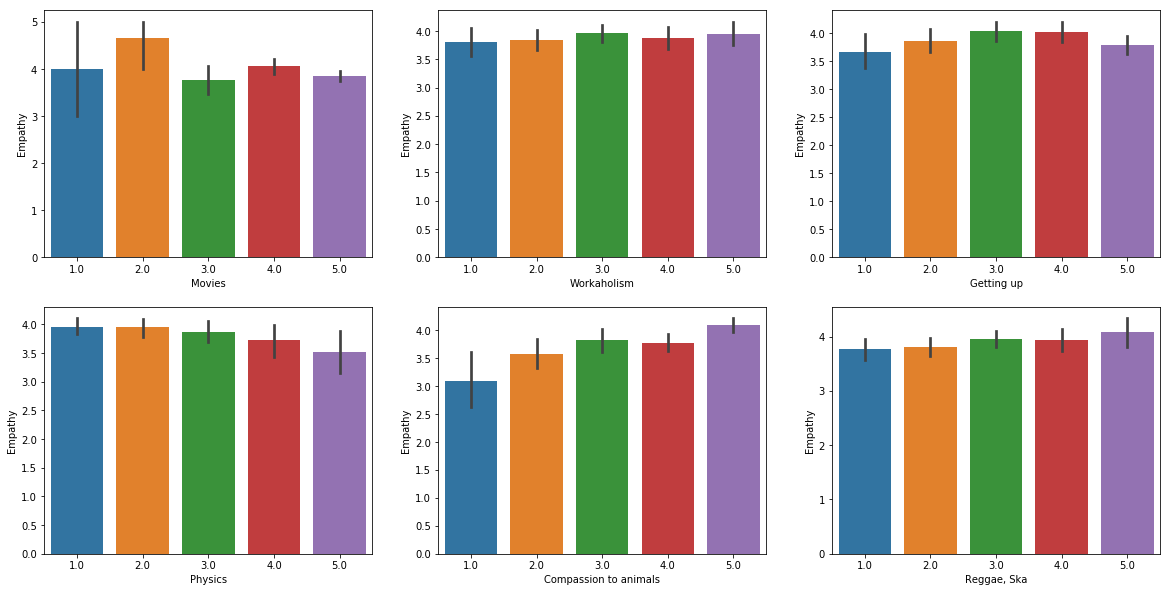

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plain_features = ['Movies', 'Workaholism', 'Getting up', 'Physics','Compassion to animals',
               'Reggae, Ska', 'Celebrities', 'Biology', 'Reading', 'Life struggles']
fig, ax = plt.subplots(nrows = 2, ncols = 3 ,figsize=(20,10))
start = 0
for j in range(2):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start], y='Empathy', data=df, ax=ax[j,i])
        start += 1
plt.show()

<center><font size="6" color="Black">DIFFERENT BASELINE MODELS</font></center>

In [46]:
#-----Different Baseline Models------#

print("Fitting Different Baseline Models... ")
print(" ")

#Strategy1: MOST FREQUENT - Always predicts the most frequent label in the training set.

bl1 = DummyClassifier(strategy='most_frequent',random_state=0)
bl1=bl1.fit(xtrain, ytrain)
p1=bl1.score(xtest, ytest)
print("Accuracy of Baseline model using MOST FREQUENT strategy: ", p1)

#Strategy2: UNIFORM - Generates predictions uniformly at random.

bl2 = DummyClassifier(strategy='uniform',random_state=0)
bl2=bl2.fit(xtrain, ytrain)
p2=bl2.score(xtest, ytest)
print("Accuracy of Baseline model using UNIFORM strategy: ", p2)

#Strategy3: STRATIFIED - Generates random predictions by respecting the training set class distribution.
bl3 = DummyClassifier(strategy='stratified',random_state=0)
bl3=bl3.fit(xtrain, ytrain)
p3=bl3.score(xtest, ytest)
print("Accuracy of Baseline model using STRATIFIED strategy: ", p3)

Fitting Different Baseline Models... 
 
Accuracy of Baseline model using MOST FREQUENT strategy:  0.29411764705882354
Accuracy of Baseline model using UNIFORM strategy:  0.1323529411764706
Accuracy of Baseline model using STRATIFIED strategy:  0.22058823529411764


<center><font size="6" color="Black"><b>CLASSIFICATION MODELS</b></font></center>

1. <b> All models have the testing accuracy higher than the baseline models (highest being 29%)</b>
2. <b>The metric used to evaluate all models is "Accuracy" and as you can see below for each model, the f1- score is less as comapred to the actuall accuracy.</b>


<center><font size="5" color="BlUE">Stochastic Gradient Descent (SGD) </font></center>

<b>SGD model performs poorly without hyperparameter tuning, GridSearch CV finds the best set of hyperparameters. Development data set is used for tuning of parameters since its a conventinonal practice to use. Once the parameters are found, the model is fit using those parameters and the test data is used to predict the ouptut which is later compared to the actual label.</b>

In [47]:
#----------------------Classification Models--------------------#

from accuracy import find_accuracies

#Model 1: Using Stochastic Gradient Descent
clf1 = linear_model.SGDClassifier(max_iter=1000)
clf1= clf1.fit(xtrain, ytrain)
predtrain,predtest,trainacc,testacc=find_accuracies(clf1,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy for SGD model: ", trainacc / 100.0 )
print ( "Testing accuracy for SGD model: ", testacc / 100.0 )

#Now, since the model is not giving much good accuracy against baseline models on test data, we will tune hyperparamters
#using validation data and Gridsearch CV approach for almost every model.


params_SGD={
            'loss': ['hinge','log'],
            'penalty': ['l1','l2'],
            'max_iter':[1000,2000,3000]
            }

gs1=GridSearchCV(clf1, params_SGD)

#Fitting the model using development dataset since its a conventional technique to use dev data set for hyperparameter tuning.
gs1.fit(np.array(xdev), np.array(ydev))

print("Best Parameters for SGD:", gs1.best_params_)

print(" ")
print("---Accuracies for SGD model after hyperparameter tuning---")

gs1=linear_model.SGDClassifier(loss='log', max_iter=1000, penalty='l1')
gs1.fit(xtrain,ytrain)
#We notice that even after hyperparameter tuning, model fails to give good results.
predtrain,predtest,trainacc,testacc=find_accuracies(gs1,xtrain,ytrain,xtest,ytest)
print ( "Training accuracy: ", trainacc / 100.0 )
print ( "Testing accuracy: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )

 
Training accuracy for SGD model:  0.47495361781076134
Testing accuracy for SGD model:  0.4117647058823529
Best Parameters for SGD: {'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}
 
---Accuracies for SGD model after hyperparameter tuning---
Training accuracy:  0.521335807050093
Testing accuracy:  0.36764705882352905
 
  A. Confusion matrix:
 [[ 0  0  2  0  0]
 [ 2  1  2  1  1]
 [ 0  2  4  8  4]
 [ 2  0  1  9  9]
 [ 1  1  3  4 11]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.25      0.14      0.18         7
        3.0       0.33      0.22      0.27        18
        4.0       0.41      0.43      0.42        21
        5.0       0.44      0.55      0.49        20

avg / total       0.37      0.37      0.36        68
 



<center><font size="5" color="BlUE">Support Vector Machine (SVM) </font></center>

<b>SVM model with kernel=rbf i.e gaussian turns out to be a good model since the training data is linearly inseparable so gaussian kernel try to prevent misclassification as hard as possible.</b>

In [48]:
#Model 2: Support Vector Classification
from accuracy import *

clf2 = SVC()
clf2.fit(xtrain, ytrain)
predtrain,predtest,trainacc,testacc=find_accuracies(clf2,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy for SVC model: ", trainacc / 100.0 )
print ( "Testing accuracy for SVC model: ", testacc / 100.0 )

#We see that the model is overfitting, so there is a need to tune hyperparameters to avoid overfitting

params_SVC= {'C': [1, 10, 100, 1000],
         'gamma': [0.001, 0.001],
         'kernel': ['linear','rbf']}


gs2=GridSearchCV(clf2, params_SVC)

gs2.fit(np.array(xdev), np.array(ydev))

print("Best Parameters for SVC:", gs2.best_params_)
gs2=SVC(C= 10, gamma= 0.001, kernel= 'rbf')
gs2.fit(xtrain,ytrain)

#Finding the examples in the development data set that were wrongly classified even after parameter tuning
gs_dev=gs2
gs_dev.fit(xtrain, ytrain)
corrlist,incorrlist=find_corincor_devdata(gs_dev,np.array(xdev),np.array(ydev))
print(" ")
print ( "Few Examples from Development Set correctly classified are as follow:")
print(corrlist)
print(" ")
print ( "Few Examples from Development Set incorrectly classified are as follow:")
print(incorrlist)

print(" ")
print("---Accuracies for SVC model after hyperparameter tuning---")

#Now, model overfits less but there is decrement in the test accuracy.
predtrain,predtest,trainacc,testacc=find_accuracies(gs2,xtrain,ytrain,xtest,ytest)
print ( "Training accuracy: ", trainacc / 100.0 )
print ( "Testing accuracy: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )


 
Training accuracy for SVC model:  0.9777365491651192
Testing accuracy for SVC model:  0.2941176470588232
Best Parameters for SVC: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
 
Few Examples from Development Set correctly classified are as follow:
[array([  4.,   4.,   2.,   2.,   4.,   3.,   2.,   4.,   2.,   2.,   3.,
         4.,   3.,   4.,   2.,   2.,   4.,   3.,   4.,   5.,   2.,   2.,
         3.,   3.,   4.,   4.,   3.,  18., 203.,  89.]), array([  2.,   2.,   2.,   3.,   3.,   5.,   2.,   1.,   2.,   1.,   1.,
         1.,   2.,   3.,   1.,   3.,   3.,   1.,   4.,   3.,   4.,   3.,
         3.,   5.,   3.,   2.,   4.,  20., 181.,  73.]), array([  3.,   1.,   1.,   1.,   3.,   2.,   3.,   1.,   1.,   1.,   1.,
         1.,   1.,   2.,   3.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         3.,   3.,   3.,   3.,   5.,  18., 176.,  76.]), array([  5.,   4.,   2.,   1.,   5.,   5.,   4.,   1.,   3.,   3.,   5.,
         2.,   5.,   1.,   3.,   2.,   5.,   2.,   5.,   5.,   4.,   

/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


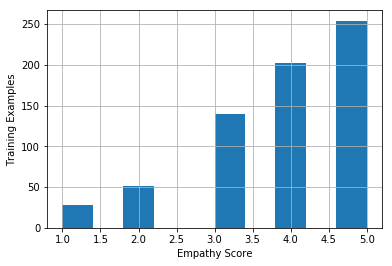

In [49]:
import matplotlib.pyplot as plt
df["Empathy"].hist()

plt.xlabel("Empathy Score")
plt.ylabel("Training Examples")
plt.show()

<b>ANSWER f (of manual):</b>

1. Accuracies keep on changing by a margin of 5% after parameter tuning. But after maximum runs, SVC gives better result with descent accuracy as compared to other models.
2. Some correct and incorrect classification of development data set are printed above. <b><i> If I were to try to fix the ones that are wrongly classified, since I am using SVC here, I would try to tune hyperparameters more , e.g. value of C is set to 100 after parameter tuning. I would have removed Gridsearch and set the value of C to maximum value (1000). Thus, For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

<center><font size="5" color="BlUE">Logistic Regression (LR) </font></center>

In [50]:
#Model 3: Logistic Regression

from accuracy import find_accuracies
clf3 = linear_model.LogisticRegression()
clf3.fit(xtrain, ytrain)
predtrain,predtest,trainacc,testacc=find_accuracies(clf3,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy for Logistic Regression model: ", trainacc / 100.0 )
print ( "Testing accuracy for Logistic Regression model: ", testacc / 100.0 )


params_logistic= {
            'penalty': ['l1','l2'],
            'C': [1, 10, 100, 1000],
            'max_iter':[100,1000,2000,3000],
        }


gs3=GridSearchCV(clf3, params_logistic)

gs3.fit(np.array(xdev), np.array(ydev))

print("Best Parameters for Logistic Regression:", gs3.best_params_)
gs3=linear_model.LogisticRegression(C= 1, max_iter= 100, penalty= 'l1')
gs3.fit(xtrain,ytrain)

print(" ")
print("---Accuracies for Logistic Regression model after hyperparameter tuning---")

predtrain,predtest,trainacc,testacc=find_accuracies(gs3,xtrain,ytrain,xtest,ytest)
print ( "Training accuracy: ", trainacc / 100.0 )
print ( "Testing accuracy: ", testacc / 100.0 )

print(" ")

print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )

 
Training accuracy for Logistic Regression model:  0.551020408163266
Testing accuracy for Logistic Regression model:  0.39705882352941246
Best Parameters for Logistic Regression: {'C': 1000, 'max_iter': 100, 'penalty': 'l1'}
 
---Accuracies for Logistic Regression model after hyperparameter tuning---
Training accuracy:  0.5473098330241177
Testing accuracy:  0.4117647058823529
 
  A. Confusion matrix:
 [[ 0  0  1  0  1]
 [ 0  0  2  4  1]
 [ 0  0  6  6  6]
 [ 1  0  1  6 13]
 [ 0  0  0  4 16]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.00      0.00      0.00         7
        3.0       0.60      0.33      0.43        18
        4.0       0.30      0.29      0.29        21
        5.0       0.43      0.80      0.56        20

avg / total       0.38      0.41      0.37        68
 



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b> Logistic Regression gives pretty good accuracy too </b>

<center><font size="5" color="BlUE"> Random Forest </font></center>

In [51]:
#Model 4: Random Forest

from accuracy import find_accuracies
clf4 = RandomForestClassifier()
clf4.fit(xtrain, ytrain)
predtrain,predtest,trainacc,testacc=find_accuracies(clf4,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy for Random Forest model: ", trainacc / 100.0 )
print ( "Testing accuracy for Random Forest model: ", testacc / 100.0 )

random= {
            'n_estimators': [403,500,600],
            'random_state': [200,420,500,666],
            'n_jobs':[-1]
        }


gs4=GridSearchCV(clf4,random)

gs4.fit(np.array(xdev), np.array(ydev))

print("Best Parameters for Random Forest Model:", gs4.best_params_)
gs4=RandomForestClassifier(n_estimators= 403, n_jobs= -1, random_state= 666)
gs4.fit(xtrain,ytrain)

#Finding the examples in the development data set that were wrongly classified even after parameter tuning
gs_dev=gs4
gs_dev.fit(np.array(xdev), np.array(ydev))
predtrain,predtest,trainacc,testacc=find_accuracies(gs_dev,xdev,ydev,xtest,ytest)
print(" ")
print ( "Development Set accuracy after paramter tuning: ", testacc / 100.0 )



print(" ")
print("---Accuracies for Random Forest model after hyperparameter tuning---")

predtrain,predtest,trainacc,testacc=find_accuracies(gs4,xtrain,ytrain,xtest,ytest)
print ( "Training accuracy: ", trainacc / 100.0 )
print ( "Testing accuracy: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )



 
Training accuracy for Random Forest model:  0.9907235621521312
Testing accuracy for Random Forest model:  0.30882352941176455
Best Parameters for Random Forest Model: {'n_estimators': 403, 'n_jobs': -1, 'random_state': 666}
 
Development Set accuracy after paramter tuning:  0.4411764705882345
 
---Accuracies for Random Forest model after hyperparameter tuning---
Training accuracy:  0.36920222634508343
Testing accuracy:  0.4411764705882345
 
  A. Confusion matrix:
 [[ 0  1  0  0  1]
 [ 0  1  3  3  0]
 [ 0  1  3  6  8]
 [ 0  0  0 14  7]
 [ 0  1  1  6 12]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.25      0.14      0.18         7
        3.0       0.43      0.17      0.24        18
        4.0       0.48      0.67      0.56        21
        5.0       0.43      0.60      0.50        20

avg / total       0.41      0.44      0.40        68
 



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<center><font size="5" color="BlUE">Ensemble of Classifiers</font></center>

In [52]:
#Ensembling Different Classifiers
#Almost give the same results as that of Random Forest model--Takes a lot of time so you can chose to ignore

from accuracy import find_accuracies
from sklearn.metrics import classification_report,confusion_matrix

ensemble_voting=VotingClassifier([("SGD",gs1),("SVC",gs2),("logistic",gs3),("RandomForest",clf4)],weights=[1,1,1,2])
ensemble_voting.fit(xtrain,ytrain)
predtrain,predtest,trainacc,testacc=find_accuracies(ensemble_voting,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy using ensembling method: ", trainacc / 100.0 )
print ( "Testing accuracy using ensembling method: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )


 
Training accuracy using ensembling method:  0.7866419294990706
Testing accuracy using ensembling method:  0.38235294117647095
 
  A. Confusion matrix:
 [[ 0  0  1  0  1]
 [ 0  1  2  3  1]
 [ 0  0  6  6  6]
 [ 1  0  3  5 12]
 [ 0  1  3  2 14]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.50      0.14      0.22         7
        3.0       0.40      0.33      0.36        18
        4.0       0.31      0.24      0.27        21
        5.0       0.41      0.70      0.52        20

avg / total       0.37      0.38      0.36        68
 



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<center><font size="5" color="BlUE">Extreme Gradient Boosting (XGBoost)</font></center>

In [53]:
from accuracy import find_accuracies

clf5 = xgb.XGBClassifier()
clf5.fit(xtrain, ytrain)

predtrain,predtest,trainacc,testacc=find_accuracies(clf5,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy using XGBoost method: ", trainacc / 100.0 )
print ( "Testing accuracy using XGBoost method: ", testacc / 100.0 )


#Parameter Tuning
parameters = {'nthread':[4,5],
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000],
              'missing':[-999],
              'seed': [1337]}


gs5 = GridSearchCV(clf5, parameters)

gs5.fit(np.array(xdev), np.array(ydev))

print("Best Parameters for XGBoost Model:", gs5.best_params_)
gs5=xgb.XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 6, min_child_weight= 11, missing= -999, n_estimators= 500, nthread= 4, objective= 'binary:logistic', seed= 1337, silent= 1, subsample= 0.8)
gs5.fit(xtrain,ytrain)



predtrain,predtest,trainacc,testacc=find_accuracies(gs5,xtrain,ytrain,xtest,ytest)

print(" ")
print("---Accuracies for XGBoost model after hyperparameter tuning---")
print ( "Training accuracy: ", trainacc / 100.0 )
print ( "Testing accuracy: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


 
Training accuracy using XGBoost method:  0.8942486085343249
Testing accuracy using XGBoost method:  0.36764705882352905


/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Best Parameters for XGBoost Model: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 500, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
 
---Accuracies for XGBoost model after hyperparameter tuning---
Training accuracy:  0.9554730983302413
Testing accuracy:  0.4117647058823529
 
  A. Confusion matrix:
 [[ 0  0  0  0  2]
 [ 0  0  3  3  1]
 [ 0  0  6  6  6]
 [ 0  1  3  9  8]
 [ 0  0  5  2 13]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.00      0.00      0.00         7
        3.0       0.35      0.33      0.34        18
        4.0       0.45      0.43      0.44        21
        5.0       0.43      0.65      0.52        20

avg / total       0.36      0.41      0.38        68
 



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


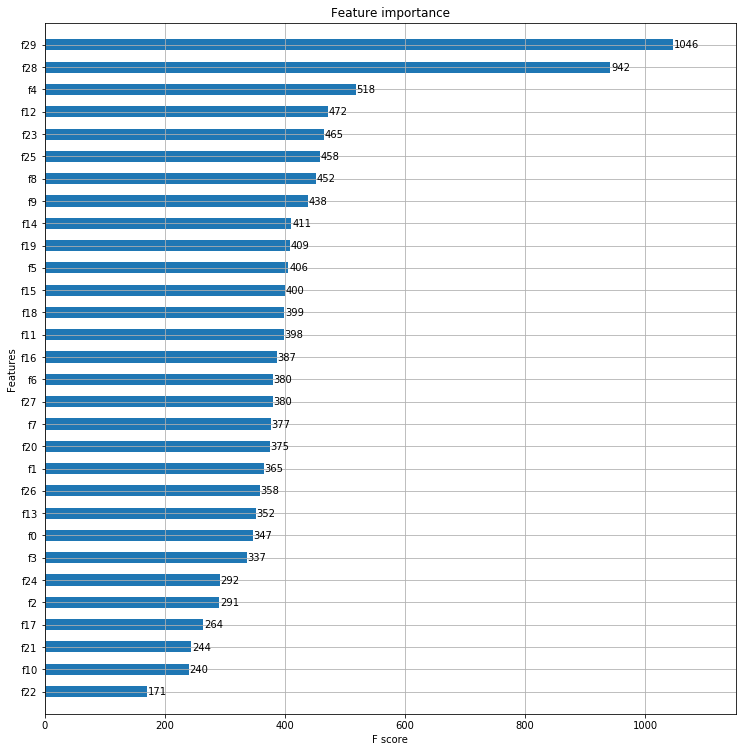

In [54]:
#Feature importance using XGBoost

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xgb.plot_importance(gs5,height=0.5,ax=axes)
plt.show()

<center><font size="5" color="BlUE">Ada Boost</font></center>

In [55]:
#Model 6: AdaBoost
from accuracy import find_accuracies

clf6 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), n_estimators=300,
    algorithm="SAMME.R", learning_rate=1, random_state=65)
clf6.fit(xtrain, ytrain)

predtrain,predtest,trainacc,testacc=find_accuracies(clf6,xtrain,ytrain,xtest,ytest)
print(" ")
print ( "Training accuracy using AdaBoost method: ", trainacc / 100.0 )
print ( "Testing accuracy using Adaboost method: ", testacc / 100.0 )

print(" ")
print ( '  A. Confusion matrix:\n', confusion_matrix ( ytest, predtest ), '\n' )
print ( '  B. Classification Report:\n', classification_report ( ytest, predtest ), '\n' )

 
Training accuracy using AdaBoost method:  0.9981447124304275
Testing accuracy using Adaboost method:  0.4411764705882345
 
  A. Confusion matrix:
 [[ 0  0  1  0  1]
 [ 0  0  4  3  0]
 [ 0  0  7  7  4]
 [ 0  0  0 12  9]
 [ 0  0  1  8 11]] 

  B. Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.00      0.00      0.00         7
        3.0       0.54      0.39      0.45        18
        4.0       0.40      0.57      0.47        21
        5.0       0.44      0.55      0.49        20

avg / total       0.40      0.44      0.41        68
 



/Users/chirag/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<center><font size="5" color="BlUE">WORD CLOUD OF ALL FEATURES</font></center>

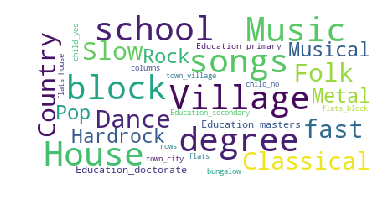

In [62]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

References:
1. https://www.kaggle.com/jkokatjuhha/in-depth-visualisations-simple-methods
2. https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb
3. http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
4. https://www.kaggle.com/adiljadoon/word-cloud-with-python